# 1.IMPORT LIBRARIES

In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

# 2. READING AND PROCESSING DATA

In [23]:
# Read data from the CSV file
file_path = '/content/ETH-USD.csv'  # Change to the actual path of your CSV file
df = pd.read_csv(file_path)

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Display the first few rows of the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-11,1268.089966,1337.300049,1135.170044,1154.930054,1154.930054,7235899904
1,2018-01-12,1158.290039,1296.040039,1120.089966,1273.199951,1273.199951,5222300160
2,2018-01-13,1270.469971,1432.880005,1270.469971,1396.420044,1396.420044,5746760192
3,2018-01-14,1397.479980,1400.560059,1286.209961,1366.770020,1366.770020,4841630208
4,2018-01-15,1365.209961,1390.589966,1290.599976,1291.920044,1291.920044,4781100032
...,...,...,...,...,...,...,...
1822,2023-01-07,1269.419800,1270.598267,1262.271118,1264.270386,1264.270386,2565213548
1823,2023-01-08,1264.181885,1287.359497,1260.226807,1287.359497,1287.359497,3495088905
1824,2023-01-09,1287.450806,1342.144165,1286.680786,1321.538940,1321.538940,7990438824
1825,2023-01-10,1321.395508,1342.757202,1318.527222,1336.586060,1336.586060,5830173253


# 3. CHART SHOW


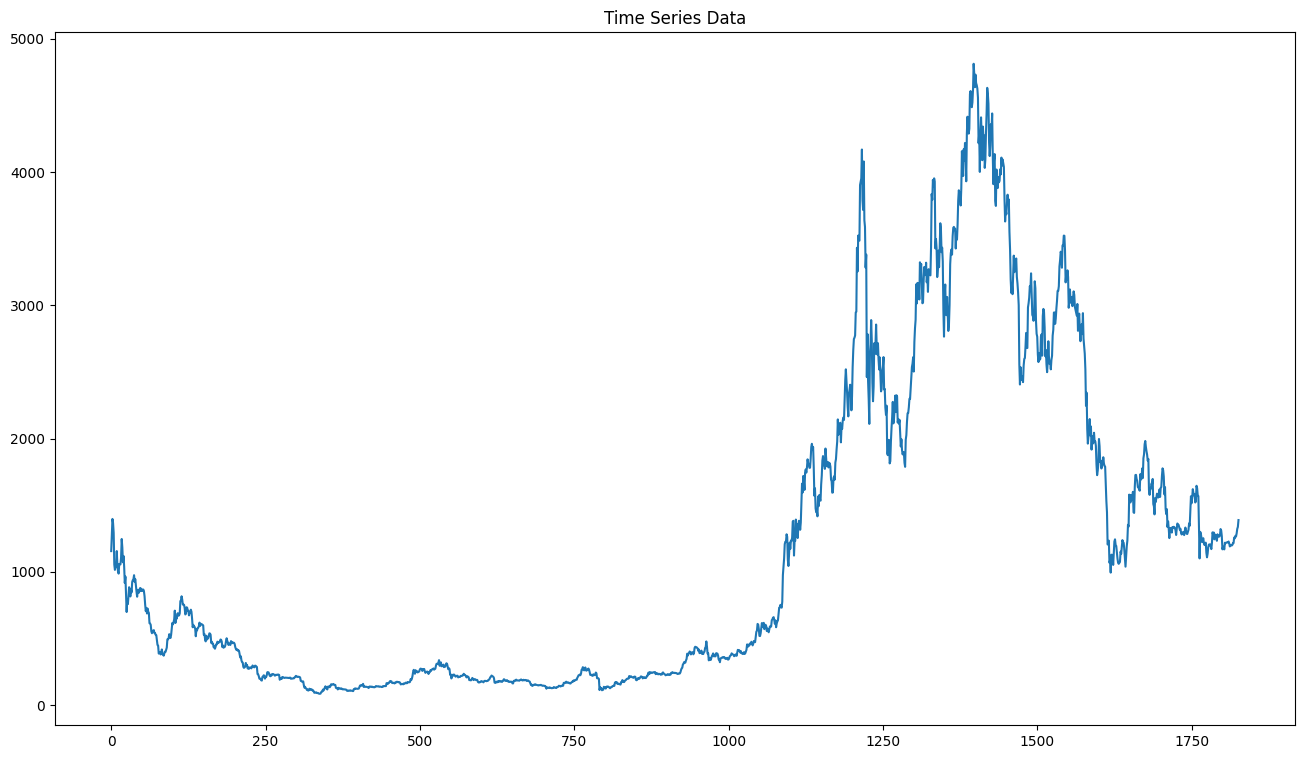

In [74]:
plt.figure(figsize=(16,9))
plt.title('Time Series Data')
plt.plot(df['Close'])
plt.show()

# 4. CHECK ADF TEST TO SEE IF THE DATA IS STATIONARY

In [28]:
# Function to test stationarity using ADF test
def adf_test(timeseries):
    timeseries.replace([np.inf, -np.inf], np.nan, inplace=True)
    timeseries.dropna(inplace=True)
    result = adfuller(timeseries, autolag='AIC')

    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Check the p-value
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary.")
    else:
        print("Fail to reject the null hypothesis. Data is non-stationary.")

# Test the stationarity of the data
adf_test(df['Close'])

ADF Statistic: -1.3211394388208608
p-value: 0.6194463638679484
Critical Values: {'1%': -3.4339700129534423, '5%': -2.8631390341376393, '10%': -2.567621272963846}
Fail to reject the null hypothesis. Data is non-stationary.


# 5. THE RESULT SHOW THAT THE DATA IS NON-STATIONARY
 SO WE NEED TO USE METHOD TO MAKE IT STATIONARY - IN HERE IS DIFF METHOD

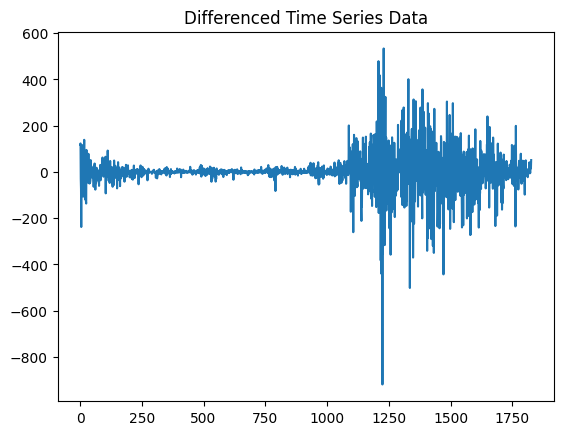

ADF Statistic: -10.631732566560162
p-value: 5.193470242471054e-19
Critical Values: {'1%': -3.4339700129534423, '5%': -2.8631390341376393, '10%': -2.567621272963846}
Reject the null hypothesis. Data is stationary.


In [52]:
# Take the first difference to make the data stationary
df['Close_diff'] = df['Close'].diff().dropna()

# Visualize the differenced data (if needed)
plt.plot(df['Close_diff'])
plt.title('Differenced Time Series Data')
plt.show()

# Test the stationarity of the differenced data
adf_test(df['Close_diff'])

# 6. NOW THE P-VALUE IS < 0.05 SO THE DATA IS STATIONARY
Next we will import auto_arima to find the best model


In [33]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00


In [34]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [63]:
# Split the data into training, testing, and validation sets 7:2:1
train_size = int(0.7 * len(df))
test_size = int(0.2* len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]


x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [65]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14127.185, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14176.113, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14145.842, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14152.397, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14174.309, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14126.998, Time=2.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14129.866, Time=1.51 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14125.073, Time=2.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14131.929, Time=1.63 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=14130.634, Time=1.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=14123.306, Time=0.57 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=14150.649, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=14144.100, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=14130.134, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

# 7. THE BEST ARIMA MODEL IS (1,1,1)


In [66]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [67]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)


# Create an array of 100 consecutive integers starting from last_index
x_next_100_days = np.array(range(last_index+1, last_index+101)).reshape(-1, 1)

# Predict the closing prices for the next 100 days
y_next_100_days = model.predict(n_periods=len(x_next_100_days))

# Print the predicted closing prices for the next 100 days
print('Predicted closing prices for the next 100 days:')
print(y_next_100_days)

Predicted closing prices for the next 30 days:
[2129.1386132  2137.61155569 2130.79134721 2136.28120434 2131.86219993
 2135.41923238 2132.55603545 2134.86073656 2133.00559095 2134.49887146
 2133.29687057 2134.2644089  2133.48559881 2134.11249404 2133.60788113
 2134.01406413 2133.68711127 2133.95028864 2133.73844671 2133.9089667
 2133.77170838 2133.88219306 2133.79325954 2133.86484567 2133.80722315
 2133.85360581 2133.81627056 2133.84632319 2133.82213263 2133.84160457]
Predicted closing prices for the next 100 days:
[2129.1386132  2137.61155569 2130.79134721 2136.28120434 2131.86219993
 2135.41923238 2132.55603545 2134.86073656 2133.00559095 2134.49887146
 2133.29687057 2134.2644089  2133.48559881 2134.11249404 2133.60788113
 2134.01406413 2133.68711127 2133.95028864 2133.73844671 2133.9089667
 2133.77170838 2133.88219306 2133.79325954 2133.86484567 2133.80722315
 2133.85360581 2133.81627056 2133.84632319 2133.82213263 2133.84160457
 2133.82593083 2133.83854725 2133.8283918  2133.836566

# 8. ACCURACY ASSESSMENT

In [72]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
valid_mae = np.mean(np.abs(y_pred_val - y_val))
valid_mape = np.mean(np.abs((y_pred_val - y_val) / y_val)) * 100

test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
test_mae = np.mean(np.abs(y_pred - y_test))
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100

print('Validation RMSE:', valid_rmse)
print('Validation MAE:', valid_mae)
print('Validation MAPE:', valid_mape)

print('Testing RMSE:', test_rmse)
print('Testing MAE:', test_mae)
print('Testing MAPE:', test_mape)

Validation RMSE: 747.5912965825693
Validation MAE: 718.5033867436489
Validation MAPE: 53.80784085988007
Testing RMSE: 1257.2019837815394
Testing MAE: 1078.3293204682336
Testing MAPE: 35.75663611170663


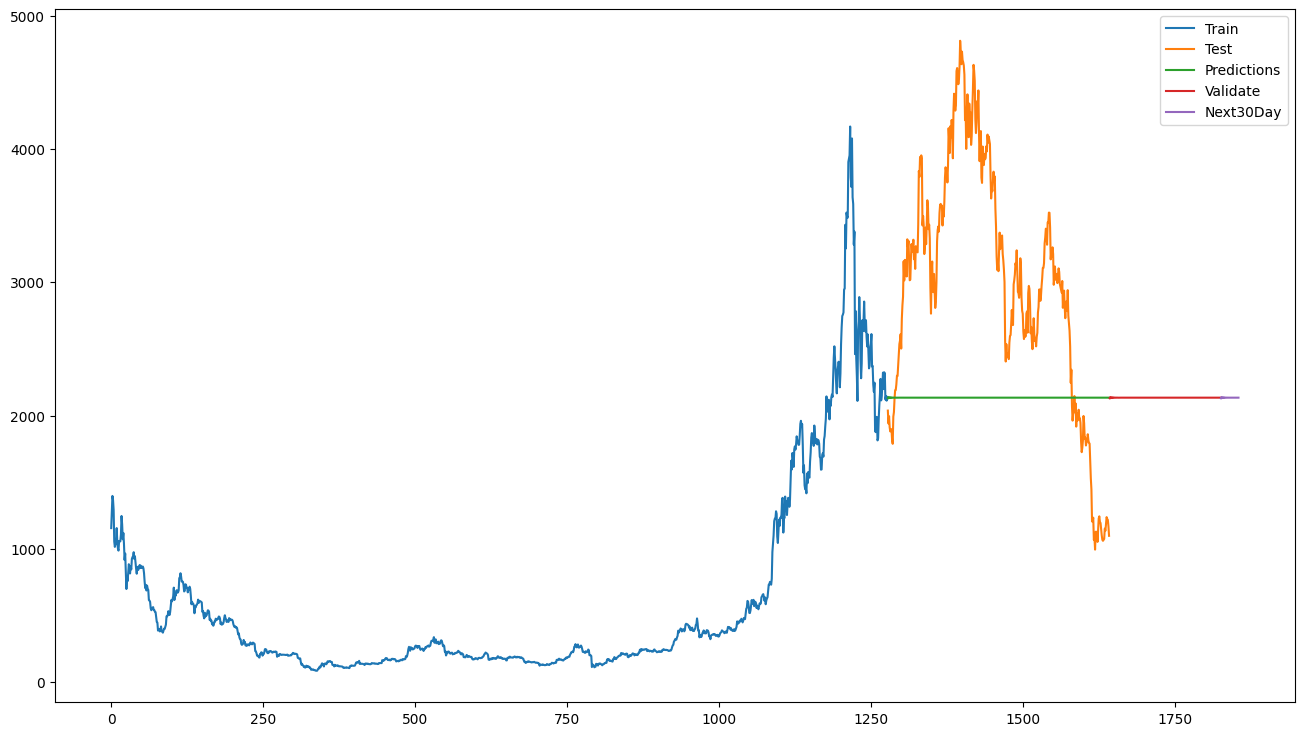

In [73]:

# 9.Vẽ hình
plt.figure(figsize=(16,9))
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()